In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    # plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF1.json')

##### 'img' is used to store the final image


####### implment you direct volume rendering here and store the final image in "img"
print("TODO: you shoud implment direct volume rendering here")
            
img = np.zeros([125, 125, 3])
####### show final image (img)


TODO: you shoud implment direct volume rendering here


In [2]:
def getinterpolation(x0,x1,y0,y1,datavalue):
    return y0+(datavalue-x0)*((y1-y0)/(x1-x0))

def getvalue(datavalue,TransferFunc,parrameter):
    for i in range(len(TransferFunc)):
        try:
            if datavalue >= TransferFunc[i][0] and datavalue < TransferFunc[i+1][0]:
                if parrameter ==0:
                    return getinterpolation(TransferFunc[i][0],TransferFunc[i+1][0],TransferFunc[i][1],TransferFunc[i+1][1],datavalue)
                else :
                     R = getinterpolation(TransferFunc[i][0],TransferFunc[i+1][0],TransferFunc[i][1],TransferFunc[i+1][1],datavalue)
                     G = getinterpolation(TransferFunc[i][0],TransferFunc[i+1][0],TransferFunc[i][2],TransferFunc[i+1][2],datavalue)
                     B = getinterpolation(TransferFunc[i][0],TransferFunc[i+1][0],TransferFunc[i][3],TransferFunc[i+1][3],datavalue)
                return R,G,B
        except:
            pass


def get_Cout(C_in,C_x,opacity):
    # R = R * (1-a) + r * a
    R = C_in[0]*(1-opacity)+C_x[0]*opacity
    G = C_in[1]*(1-opacity)+C_x[1]*opacity
    B = C_in[2]*(1-opacity)+C_x[2]*opacity
    return R,G,B

def Back_to_Front_Compositing(Cout_temp):
    global img
    C_out = [0,0,0]

    for i in range(len(Cout_temp)-1,-1,-1):
        C_in = C_out
        C_out = get_Cout(C_in,Cout_temp[i]['color'],Cout_temp[i]['opacity'])
    
    return C_out
    

In [3]:
Cout_temp = []
def value_trans():
    
    for x in range(125):
        
        for y in range(125):
            C_out = [0,0,0]
            Cout_temp = []
            for z in range(50):
                temp = {}
                cell_value = getValue(x,y,z)
                opacity = getvalue(cell_value,opacityTransferFunc,0)
                
                # get color
                color = getvalue(cell_value,colorTransferFunc,1)
                temp['color'] = color
                temp['opacity'] = opacity
                Cout_temp.append(temp)
            C_out = Back_to_Front_Compositing(Cout_temp)
        
        

            img[x,y,0] = C_out[0]
            img[x,y,1] = C_out[1]
            img[x,y,2] = C_out[2]
         
    


T1

In [6]:
value_trans()
plt.imshow(img)
plt.show()

T2

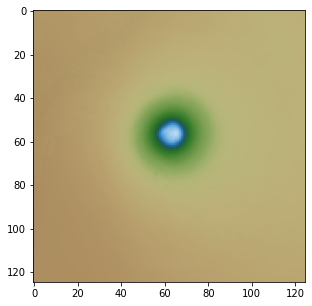

In [733]:
value_trans()
plt.imshow(img)
plt.show()